In [3]:
import requests
import csv
import time
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set_style('white')
import os

<Figure size 640x480 with 0 Axes>

In [87]:
# Straight bad word filter

url = "https://community-purgomalum.p.rapidapi.com/json"

with open('labeled_data_rand.csv') as csvfile, \
    open('dataSimple.csv', mode='w') as dataSimple:
    reader = csv.reader(csvfile)
    dataSimple = csv.writer(dataSimple, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataSimple.writerow(['api_type','line_num', 'tweet', "api_eval", "init_eval", "false_positive","false_negative"])
    
    for i in reader:
        classifier1 = i[5] #class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
        tweet1 = i[6]
        if reader.line_num>5000 and reader.line_num <5101:
            #payload = "content=var7;"""
            time.sleep(2)
            querystring = {"text": tweet1}
            headers = {
                "X-RapidAPI-Key": "#######",
                "X-RapidAPI-Host": "community-purgomalum.p.rapidapi.com"
            }
            response = requests.request("GET", url, headers=headers, params=querystring)
            API_TYPE = 0
            FALSE_POSITIVE = 0
            FALSE_NEGATIVE = 0
            INIT_EVAL = 0
            API_EVAL = 0
            if classifier1 != "2": INIT_EVAL = 1
            if response.text.__contains__("**"): 
                API_EVAL = 1
                if classifier1 == ("2") : 
                    FALSE_POSITIVE = 1
                    print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED UNTOXIC")
            else: 
                if classifier1 != ("2") : 
                    FALSE_NEGATIVE = 1
                    print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED TOXIC")
            dataSimple.writerow([API_TYPE, reader.line_num, tweet1, API_EVAL, INIT_EVAL, FALSE_POSITIVE,FALSE_NEGATIVE])



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  


Line:5016 NO MATCH - CLASSIFIED TOXIC
Line:5017 NO MATCH - CLASSIFIED TOXIC
Line:5024 NO MATCH - CLASSIFIED TOXIC
Line:5026 NO MATCH - CLASSIFIED TOXIC
Line:5036 NO MATCH - CLASSIFIED TOXIC
Line:5062 NO MATCH - CLASSIFIED TOXIC
Line:5076 NO MATCH - CLASSIFIED TOXIC
Line:5083 NO MATCH - CLASSIFIED TOXIC
Line:5084 NO MATCH - CLASSIFIED UNTOXIC
Line:5087 NO MATCH - CLASSIFIED TOXIC
Line:5088 NO MATCH - CLASSIFIED TOXIC
Line:5099 NO MATCH - CLASSIFIED TOXIC


/var/folders/t_/w_thwtlx7zxf5659k86dkhqr0000gn/T/ipykernel_89320/3567636899.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('dataSimple.csv', engine='python', error_bad_lines=False)


[Text(0, 0, 'toxic'), Text(1, 0, 'not toxic')]

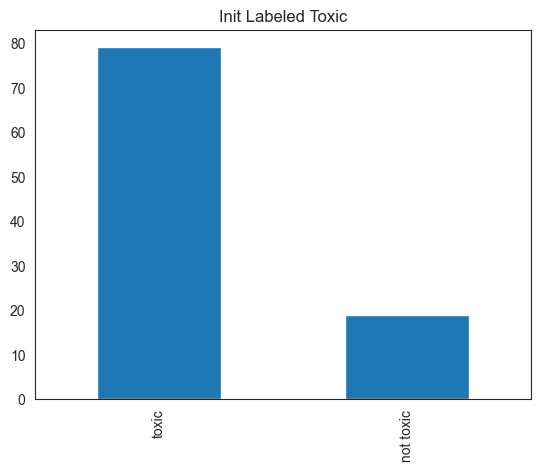

In [5]:
df = pd.read_csv('dataSimple.csv', engine='python', error_bad_lines=False)
df.head()

df['init_eval'].value_counts().plot(kind='bar')

byToxicInit = df.init_eval.value_counts()
toxicInit = byToxicInit[:2]
toxplot_init = toxicInit.plot(kind='bar');
toxplot_init.set_title('Init Labeled Toxic')
toxplot_init.set_xticklabels( ('toxic', 'not toxic') )

[Text(0, 0, 'toxic'), Text(1, 0, 'not toxic')]

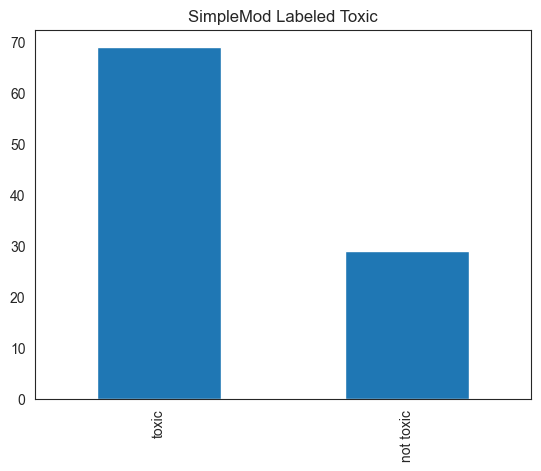

In [6]:
byToxicStraight = df.api_eval.value_counts()
toxicStraight = byToxicStraight[:2]
toxplot_straight = toxicStraight.plot(kind='bar');
toxplot_straight.set_title('SimpleMod Labeled Toxic')
toxplot_straight.set_xticklabels( ('toxic', 'not toxic') )

In [90]:
# ML toxicity checker 10,000 max

url = "https://detoxify.p.rapidapi.com/"

with open('labeled_data_rand.csv') as csvfile, \
    open('dataDetoxify.csv', mode='w') as dataDetoxify:
    reader = csv.reader(csvfile)
    dataDetoxify = csv.writer(dataDetoxify, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataDetoxify.writerow(['api_type','line_num', 'tweet', "api_eval", "init_eval", "false_positive","false_negative"])
    
    for l in reader:
        classifier2 = l[5] #class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
        tweet2 = l[6]
        if reader.line_num>5000 and reader.line_num <5101:
            time.sleep(2)
            querystring = {"text": tweet2}
            headers = {
                "content-type": "application/json",
                "X-RapidAPI-Key": "#######",
                "X-RapidAPI-Host": "detoxify.p.rapidapi.com"
            }
            response = requests.request("POST", url, json=querystring, headers=headers)
            response_data = response.json()
            #print(response_data)
            str1 = response_data.get('toxicity')
            API_TYPE = 1
            FALSE_POSITIVE = 0
            FALSE_NEGATIVE = 0
            INIT_EVAL = 0
            API_EVAL = 0
            if classifier2 != "2": INIT_EVAL = 1
            #str1 = response_data['toxicity']
            if(str1 is not None):
                #print(str1)
                if classifier2 != "2": INIT_EVAL = 1
                if float(str1[0]) >= 0.5: 
                    #print("toxic")
                    API_EVAL = 1
                    if classifier2 == ("2") : 
                        FALSE_POSITIVE = 1
                        print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED UNTOXIC")
                else: 
                    if float(str1[0]) >= 0.0: 
                        #print("not toxic")
                        if classifier2 != ("2") : 
                            FALSE_NEGATIVE = 1
                            print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED TOXIC")
                dataDetoxify.writerow([API_TYPE,reader.line_num, tweet2, API_EVAL,INIT_EVAL,FALSE_POSITIVE,FALSE_NEGATIVE])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'U' mode is deprecated
  


Line:5010 NO MATCH - CLASSIFIED UNTOXIC
Line:5017 NO MATCH - CLASSIFIED TOXIC
Line:5023 NO MATCH - CLASSIFIED UNTOXIC
Line:5059 NO MATCH - CLASSIFIED TOXIC
Line:5062 NO MATCH - CLASSIFIED TOXIC
Line:5066 NO MATCH - CLASSIFIED UNTOXIC
Line:5073 NO MATCH - CLASSIFIED TOXIC
Line:5075 NO MATCH - CLASSIFIED UNTOXIC
Line:5076 NO MATCH - CLASSIFIED TOXIC
Line:5083 NO MATCH - CLASSIFIED TOXIC
Line:5084 NO MATCH - CLASSIFIED UNTOXIC
Line:5085 NO MATCH - CLASSIFIED TOXIC
Line:5086 NO MATCH - CLASSIFIED TOXIC
Line:5088 NO MATCH - CLASSIFIED TOXIC


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


[Text(0, 0, 'toxic'), Text(1, 0, 'not toxic')]

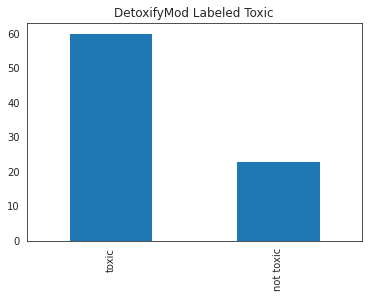

In [91]:
df = pd.read_csv('dataDetoxify.csv', engine='python', error_bad_lines=False)
df.head()

df['api_eval'].value_counts().plot(kind='bar')

byToxicStraight = df.api_eval.value_counts()
toxicStraight = byToxicStraight[:2]
toxplot_straight = toxicStraight.plot(kind='bar');
toxplot_straight.set_title('DetoxifyMod Labeled Toxic')
toxplot_straight.set_xticklabels( ('toxic', 'not toxic') )

In [93]:
### PERSPECTIVE API ML

from googleapiclient import discovery

API_KEY = '#######'

client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
)

with open('labeled_data_rand.csv') as csvfile, \
    open('dataPerspective.csv', mode='w') as dataPerspective:
    reader = csv.reader(csvfile)

    dataPerspective = csv.writer(dataPerspective, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataPerspective.writerow(['api_type','line_num', 'tweet', "api_eval", "init_eval", "false_positive","false_negative"])
  
    for j in reader:
        classifier3 = j[5]
        tweet3 = j[6]
        if reader.line_num >5000 and reader.line_num<5101:
            time.sleep(2)
            analyze_request = {
                'comment': { 'text': tweet3 },
                'languages': ["en"],
                  'requestedAttributes': {'TOXICITY': {}}
            }

            response = client.comments().analyze(body=analyze_request).execute()
            str1new = response['attributeScores']['TOXICITY']['summaryScore']['value']
            API_TYPE = 2
            FALSE_POSITIVE = 0
            FALSE_NEGATIVE = 0
            INIT_EVAL = 0
            API_EVAL = 0
            if classifier3 != "2": INIT_EVAL = 1
            if float(str1new) >= 0.5: 
                API_EVAL = 1
                if classifier3 == ("2") : 
                    FALSE_POSITIVE = 1
                    print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED UNTOXIC")                
            else: 
                if float(str1new) >= 0.0: 
                    if classifier3 != ("2") :
                        FALSE_NEGATIVE = 1
                        print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED TOXIC")
            dataPerspective.writerow([API_TYPE,reader.line_num, tweet3,API_EVAL,INIT_EVAL,FALSE_POSITIVE,FALSE_NEGATIVE])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 'U' mode is deprecated
  


Line:5007 NO MATCH - CLASSIFIED TOXIC
Line:5010 NO MATCH - CLASSIFIED UNTOXIC
Line:5017 NO MATCH - CLASSIFIED TOXIC
Line:5026 NO MATCH - CLASSIFIED TOXIC
Line:5059 NO MATCH - CLASSIFIED TOXIC
Line:5062 NO MATCH - CLASSIFIED TOXIC
Line:5066 NO MATCH - CLASSIFIED UNTOXIC
Line:5076 NO MATCH - CLASSIFIED TOXIC
Line:5084 NO MATCH - CLASSIFIED UNTOXIC
Line:5085 NO MATCH - CLASSIFIED TOXIC
Line:5087 NO MATCH - CLASSIFIED TOXIC
Line:5088 NO MATCH - CLASSIFIED TOXIC
Line:5093 NO MATCH - CLASSIFIED TOXIC
Line:5099 NO MATCH - CLASSIFIED TOXIC


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


[Text(0, 0, 'toxic'), Text(1, 0, 'not toxic')]

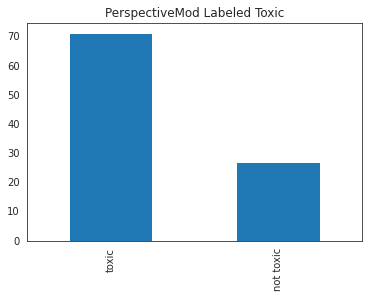

In [94]:
df = pd.read_csv('dataPerspective.csv', engine='python', error_bad_lines=False)
df.head()

df['api_eval'].value_counts().plot(kind='bar')

byToxicStraight = df.api_eval.value_counts()
toxicStraight = byToxicStraight[:2]
toxplot_straight = toxicStraight.plot(kind='bar');
toxplot_straight.set_title('PerspectiveMod Labeled Toxic')
toxplot_straight.set_xticklabels( ('toxic', 'not toxic') )

In [15]:
# Prepare training data for Nyckel
# We take the first 5000 lines of the data and extract just the tweets and the labels. The labels in the dataset are
# 0 - hate speech 1 - offensive language 2 - neither. We convert these to 'toxic' or 'not toxic'. Then we write the
# data to a csv file called nyckel_train.csv
with open('labeled_data_rand.csv') as csvfile, \
    open('nyckel_train.csv', mode='w') as nyckel_train:
    reader = csv.reader(csvfile)

    nyckel_train = csv.writer(
        nyckel_train, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    nyckel_train.writerow(['tweet', 'label'])
    # Take the first 5000 rows in reader
    count = 0
    for row in reader:
        count += 1
        if (count > 5000):
            break
        tweet = row[6]
        label = row[5]
        if label == "0" or label == "1":
            output_label = "toxic"
        else:
            output_label = "not toxic"
        nyckel_train.writerow([tweet, output_label])

In [ ]:
### NYCKEL API ML

token_url = 'https://www.nyckel.com/connect/token'
data = {'client_id': '#######', 'client_secret': '#######', 'grant_type': 'client_credentials'}

result = requests.post(token_url, data = data)
access_token = result.json()['access_token']

url = 'https://www.nyckel.com/v1/functions/hebb1ts2w5zpknv1/invoke'
headers = {
    'Authorization': f'Bearer {access_token}',
}
with open('labeled_data_rand.csv') as csvfile, \
    open('dataNyckel.csv', mode='w') as dataNyckel:
    reader = csv.reader(csvfile)
    dataNyckel = csv.writer(dataNyckel, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataNyckel.writerow(['api_type','line_num', 'tweet', "api_eval", "init_eval", "false_positive","false_negative"])

    for row in reader:
        classifier4 = row[5]
        tweet = row[6]
        if (reader.line_num >5000) and (reader.line_num<5101):
            result = requests.post(url, headers=headers, json={"data":tweet})
            response_data4 = result.json()
            str1 = response_data4.get('labelName')
            API_TYPE = 3
            FALSE_POSITIVE = 0
            FALSE_NEGATIVE = 0
            INIT_EVAL = 0
            API_EVAL = 0
            if classifier4 != "2": INIT_EVAL = 1
            if int(str1) == 1:
                API_EVAL = 1
                if classifier4 == ("2") : 
                    FALSE_POSITIVE = 1
                    print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED UNTOXIC")
            else: 
                if int(str1) == 0: 
                    if classifier4 != ("2") : 
                        FALSE_NEGATIVE = 1
                        print("Line:"+ str(reader.line_num) + " NO MATCH - CLASSIFIED TOXIC")
            dataNyckel.writerow([API_TYPE,reader.line_num, tweet, API_EVAL,INIT_EVAL,FALSE_POSITIVE,FALSE_NEGATIVE])


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


[Text(0, 0, 'toxic'), Text(1, 0, 'not toxic')]

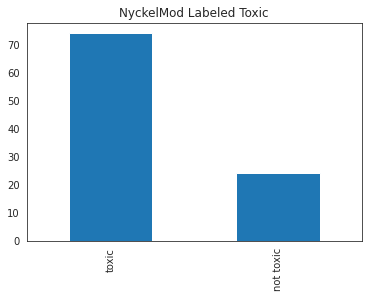

In [107]:
df = pd.read_csv('dataNyckel.csv', engine='python', error_bad_lines=False)
df.head()

df['api_eval'].value_counts().plot(kind='bar')

byToxicStraight = df.api_eval.value_counts()
toxicStraight = byToxicStraight[:2]
toxplot_straight = toxicStraight.plot(kind='bar');
toxplot_straight.set_title('NyckelMod Labeled Toxic')
toxplot_straight.set_xticklabels( ('toxic', 'not toxic') )